<a href="https://colab.research.google.com/github/khaerul21/Final-Mobile/blob/main/Compile%20model%20Alexnet%20and%20VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classes: ['scissors', 'rock', 'paper']


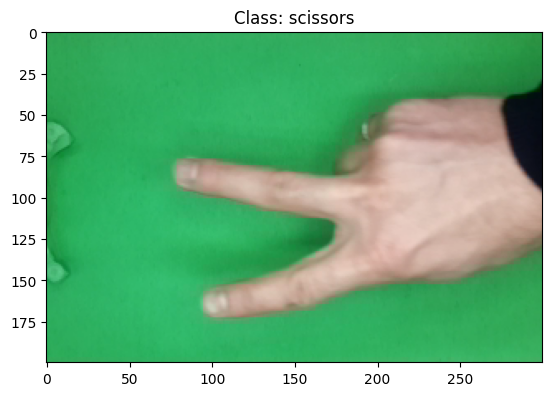

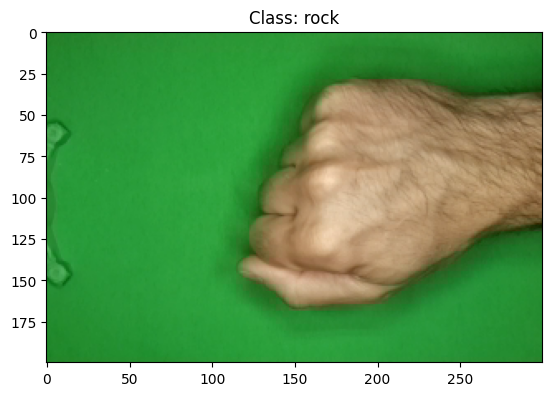

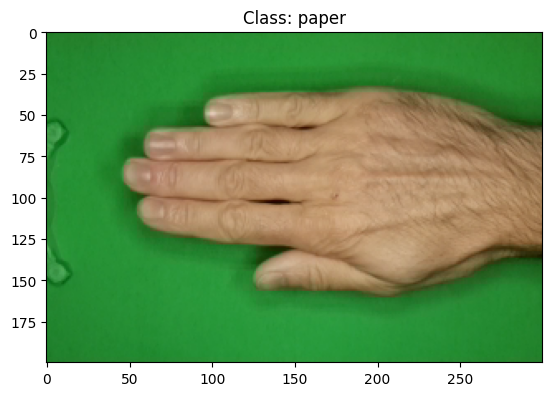

In [ ]:
from typing_extensions import dataclass_transform
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers


dataset_path = '/content/drive/MyDrive/SEMESTER 5/DeepLearning/Dataset/rps-cv-images'

classes = os.listdir(dataset_path)
print("Classes:", classes)

for cls in classes:
  class_path = os.path.join(dataset_path, cls)
  sample_img = os.listdir(class_path)[0]
  img = mpimg.imread(os.path.join(class_path, sample_img))
  plt.imshow(img)
  plt.title(f"Class: {cls}")
  plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1759 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import models, layers

def build_alexnet(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
def build_vgg16(input_shape=(224, 224, 3), num_classes=3):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
# Compile the models
alexnet = build_alexnet()
vgg16 = build_vgg16()

alexnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#Train AlexNet
history_alexnet = alexnet.fit(train_generator, validation_data=val_generator, epochs=10, verbose=2)

Epoch 1/10
55/55 - 28s - 507ms/step - accuracy: 0.8613 - loss: 0.4321 - val_accuracy: 0.3303 - val_loss: 1.0586
Epoch 2/10
55/55 - 27s - 489ms/step - accuracy: 0.9744 - loss: 0.0763 - val_accuracy: 0.5080 - val_loss: 1.0271
Epoch 3/10
55/55 - 20s - 364ms/step - accuracy: 0.9898 - loss: 0.0444 - val_accuracy: 0.3440 - val_loss: 0.9992
Epoch 4/10
55/55 - 20s - 372ms/step - accuracy: 0.9972 - loss: 0.0094 - val_accuracy: 0.3485 - val_loss: 1.0685
Epoch 5/10
55/55 - 22s - 408ms/step - accuracy: 0.9915 - loss: 0.0221 - val_accuracy: 0.3554 - val_loss: 1.1178
Epoch 6/10
55/55 - 13s - 240ms/step - accuracy: 0.9847 - loss: 0.0646 - val_accuracy: 0.9613 - val_loss: 0.3732
Epoch 7/10
55/55 - 21s - 374ms/step - accuracy: 0.9949 - loss: 0.0117 - val_accuracy: 0.9476 - val_loss: 0.1508
Epoch 8/10
55/55 - 13s - 244ms/step - accuracy: 0.9949 - loss: 0.0176 - val_accuracy: 0.9977 - val_loss: 0.0276
Epoch 9/10
55/55 - 20s - 366ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9841 - val_loss:

In [ ]:
# Train VGG16
history_vgg16 = vgg16.fit(train_generator, validation_data=val_generator, epochs=10, verbose=2, step_per_epoch=)

Epoch 1/10
55/55 - 615s - 11s/step - accuracy: 0.3263 - loss: 22.5519 - val_accuracy: 0.3462 - val_loss: 19.6383
Epoch 2/10
55/55 - 39s - 713ms/step - accuracy: 0.3457 - loss: 17.9387 - val_accuracy: 0.3462 - val_loss: 16.4003
Epoch 3/10
55/55 - 32s - 575ms/step - accuracy: 0.3457 - loss: 15.2134 - val_accuracy: 0.3462 - val_loss: 14.0943
Epoch 4/10
55/55 - 32s - 573ms/step - accuracy: 0.3457 - loss: 13.1852 - val_accuracy: 0.3462 - val_loss: 12.3119
Epoch 5/10
55/55 - 41s - 747ms/step - accuracy: 0.3457 - loss: 11.5848 - val_accuracy: 0.3462 - val_loss: 10.8780
Epoch 6/10
55/55 - 41s - 744ms/step - accuracy: 0.3331 - loss: 10.2803 - val_accuracy: 0.3462 - val_loss: 9.6954
Epoch 7/10
55/55 - 41s - 746ms/step - accuracy: 0.3457 - loss: 9.1949 - val_accuracy: 0.3462 - val_loss: 8.7029
Epoch 8/10
55/55 - 43s - 788ms/step - accuracy: 0.3468 - loss: 8.2778 - val_accuracy: 0.3462 - val_loss: 7.8589
Epoch 9/10
55/55 - 32s - 574ms/step - accuracy: 0.3457 - loss: 7.4943 - val_accuracy: 0.3462 -

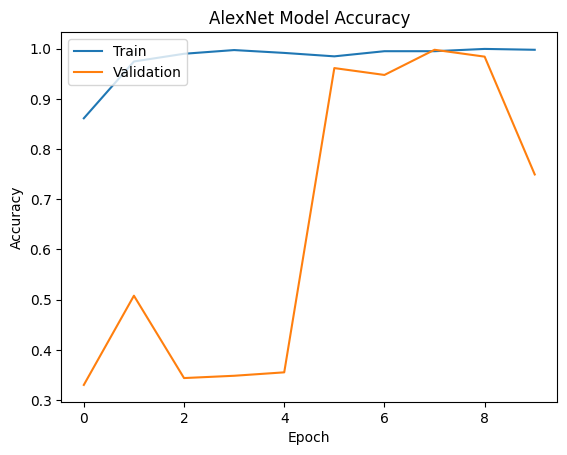

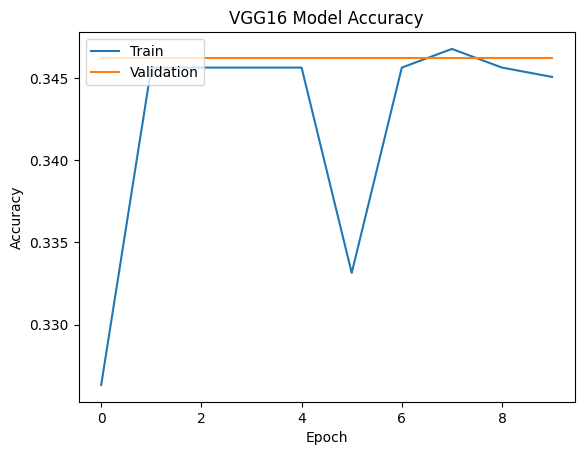

In [ ]:
plt.plot(history_alexnet.history['accuracy'])
plt.plot(history_alexnet.history['val_accuracy'])
plt.title('AlexNet Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('VGG16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step
AlexNet Confusion Matrix:
 [[10 88 44]
 [11 78 56]
 [14 86 52]]
VGG16 Confusion Matrix:
 [[  0   0 142]
 [  0   0 145]
 [  0   0 152]]
AlexNet Classification Report:
               precision    recall  f1-score   support

    scissors       0.29      0.07      0.11       142
        rock       0.31      0.54      0.39       145
       paper       0.34      0.34      0.34       152

    accuracy                           0.32       439
   macro avg       0.31      0.32      0.28       439
weighted avg       0.31      0.32      0.28       439

VGG16 Classification Report:
               precision    recall  f1-score   support

    scissors       0.00      0.00      0.00       142
        rock       0.00      0.00      0.00       145
       paper       0.35      1.00      0.51       152

    accuracy                           0.35       439
   macro avg       0.12      0.33      0.17       439
weighted avg  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


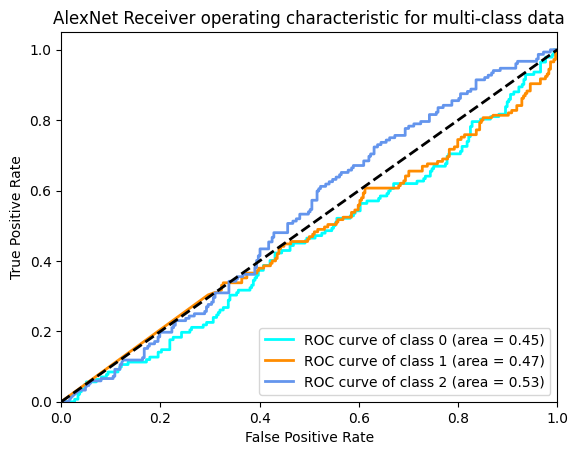

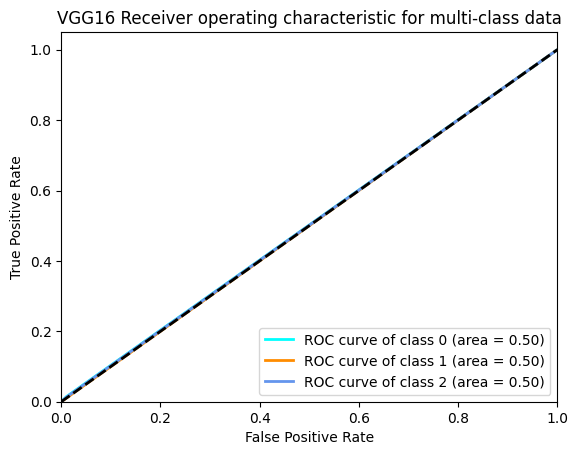

In [ ]:
#Confusion Matrix, Miss Classification rate, Akurasi, Presesi, Recal, F1 Score, Kurva AUC-ROC setiap kelas

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
from itertools import cycle

# Predict on the validation data
y_pred_alexnet = alexnet.predict(val_generator)
y_true_alexnet = val_generator.classes
y_pred_classes_alexnet = np.argmax(y_pred_alexnet, axis=1)

y_pred_vgg16 = vgg16.predict(val_generator)
y_true_vgg16 = val_generator.classes
y_pred_classes_vgg16 = np.argmax(y_pred_vgg16, axis=1)

# Confusion Matrix
cm_alexnet = confusion_matrix(y_true_alexnet, y_pred_classes_alexnet)
cm_vgg16 = confusion_matrix(y_true_vgg16, y_pred_classes_vgg16)

print("AlexNet Confusion Matrix:\n", cm_alexnet)
print("VGG16 Confusion Matrix:\n", cm_vgg16)

# Laporan Klasifikasi (termasuk Akurasi, Presisi, Recall, Skor F1)
report_alexnet = classification_report(y_true_alexnet, y_pred_classes_alexnet, target_names=classes)
report_vgg16 = classification_report(y_true_vgg16, y_pred_classes_vgg16, target_names=classes)

print("AlexNet Classification Report:\n", report_alexnet)
print("VGG16 Classification Report:\n", report_vgg16)

# Tingkat Nona Klasifikasi
miss_rate_alexnet = 1 - np.trace(cm_alexnet) / np.sum(cm_alexnet)
miss_rate_vgg16 = 1 - np.trace(cm_vgg16) / np.sum(cm_vgg16)

print("AlexNet Miss Classification Rate:", miss_rate_alexnet)
print("VGG16 Miss Classification Rate:", miss_rate_vgg16)

# AUC-ROC Curva (dengan asumsi Anda memiliki probabilitas untuk setiap kelas)
# Anda dapat menyesuaikan kode di bawah ini berdasarkan keluaran model Anda
fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(classes)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_generator.classes, y_pred_alexnet[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curva
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AlexNet Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

# Ulangi proses untuk VGG16, ubah saja y_pred_alexnet menjadi y_pred_vgg16
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(val_generator.classes, y_pred_vgg16[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot Kurva ROC untuk VGG16
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('VGG16 Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()


#Kesimpulan

Jadi, kesimpulan model yang lebih baik dari eksperimen ini ialah model alexnet. karena akurasi yang diberikan oleh model alexnet lebih bagus di bandingkan dengan VGG16. Bisa kita lihat diatas untuk aleXnet akurasi yang di berikan di atas stabil bahkan ada yang sampai menytentuh angaka 0.9977. Sedangkan pada VGG16 akurasi yang diberikan paling tinggi hanya 0.3451.

**Untuk Alexnet Precision, Recall, dan F1-Score:**

Untuk scissors: Precision 0.29, recall 0.07, dan f1-score 0.11, menunjukkan bahwa model mengalami kesulitan dalam mengenali kelas ini, dengan banyak prediksi yang keliru.

Untuk rock: Precision 0.31, recall 0.54, dan f1-score 0.39 menunjukkan kinerja model yang sedikit lebih baik dalam mendeteksi kelas ini, meskipun masih belum optimal.

Untuk paper: Precision, recall, dan f1-score berada di angka 0.34, menandakan bahwa model memiliki kemampuan yang relatif seimbang dalam mengenali kelas ini.


***Untuk VGG16 Precision, Recall, dan F1-Score:***

Scissors: Precision, recall, dan f1-score semuanya 0.00, yang menunjukkan bahwa model sama sekali tidak dapat mengenali atau memprediksi kelas ini.

Rock: Seperti kelas scissors, precision, recall, dan f1-score juga 0.00, yang berarti model gagal mendeteksi kelas ini juga.

Paper: Precision 0.35, recall 1.00, dan f1-score 0.51, menunjukkan bahwa model berhasil mengidentifikasi semua instance kelas paper dengan benar, namun membuat banyak kesalahan saat memprediksi kelas lainnya.



